In [127]:
import pandas as pd

pd.set_option('precision', 2)

In [128]:
df = pd.read_csv('data/Data2.csv', delimiter=';')

In [129]:
df.head(5)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",3.47e+07,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2.88e+06,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",4.06e+07,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",5.56e+04,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",7.73e+04,"462,042",470


# Preprocess structure of data

In [130]:
df.dtypes

Country Name       object
Region             object
GDP per capita     object
Populatiion       float64
CO2 emission       object
Area               object
dtype: object

In [131]:
df = df.rename(
    columns={
        'Country Name': 'Country',
        'GDP per capita': 'gdp',
        'CO2 emission': 'co2',
        'Populatiion': 'Population'
    }
)

df.columns

Index(['Country', 'Region', 'gdp', 'Population', 'co2', 'Area'], dtype='object')

In [132]:
df['gdp'] = df['gdp'].str.replace(',', '.').astype(float)
df['co2'] = df['co2'].str.replace(',', '.').astype(float)
df['Area'] = df['Area'].str.replace(',', '.').astype(float)

# Cleaning

In [133]:
df.shape[0], len(df['Country'].unique())

(217, 217)

In [134]:
df['Region'].value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [135]:
df.describe()

,gdp,Population,co2,Area
count,190.00,2.16e+02,2.05e+02,2.17e+02
mean,13374.83,3.43e+07,1.65e+05,6.13e+05
std,18091.79,1.35e+08,8.34e+05,1.83e+06
min,-6722.22,1.11e+04,1.10e+01,-6.77e+05
25%,1926.54,7.90e+05,1.33e+03,1.04e+04
50%,5226.29,6.22e+06,9.11e+03,9.22e+04
75%,16003.30,2.35e+07,5.99e+04,4.47e+05
max,100738.68,1.38e+09,1.03e+07,1.71e+07


In [136]:
df['gdp'] = df['gdp'].abs()
df['Area'] = df['Area'].abs()

# Building plots

_Я не очень, понял, должны ли мы изобразить на графиках все колонки, я тут показал просто два примера, чтоб показать что материал знаю._

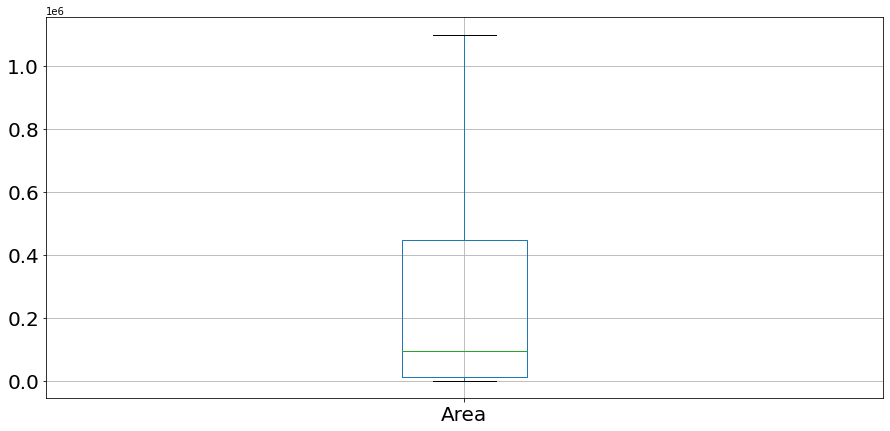

In [137]:
df.boxplot(column='Area', figsize=(15, 7), fontsize=20, showfliers=False)
None

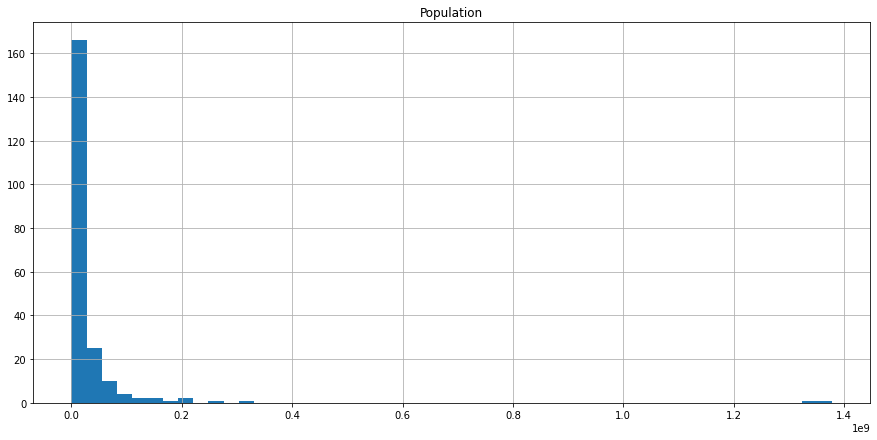

In [138]:
df.hist(column='Population', bins=50, figsize=(15, 7))
None

# Adding population density

In [139]:
df['population_density'] = df['Population'] / df['Area']

In [140]:
df.head(5)

,Country,Region,gdp,Population,co2,Area,population_density
0,Afghanistan,South Asia,561.78,3.47e+07,9809.23,6.53e+05,53.08
1,Albania,Europe & Central Asia,4124.98,2.88e+06,5716.85,2.88e+04,100.04
2,Algeria,Middle East & North Africa,3916.88,4.06e+07,145400.22,2.38e+06,17.05
3,American Samoa,East Asia & Pacific,11834.75,5.56e+04,NaN,2.00e+02,278.00
4,Andorra,Europe & Central Asia,36988.62,7.73e+04,462.04,4.70e+02,164.43


# Remove NaNs

In [141]:
df.isnull().sum()

Country                0
Region                 0
gdp                   27
Population             1
co2                   12
Area                   0
population_density     1
dtype: int64

In [143]:
df = df.fillna(df.mean().to_dict())

In [144]:
df.isnull().sum()

Country               0
Region                0
gdp                   0
Population            0
co2                   0
Area                  0
population_density    0
dtype: int64

# Answer statistical questions

In [112]:
# Яка країна має найбільший ВВП на людину (GDP per capita)? Яка має найменшу площу?

df['gdp_per_capita'] = df['gdp'] / df['Population']
data_of_country_with_max_gdp_per_capita = df[df['gdp_per_capita'] == df['gdp_per_capita'].max()]

print(f'Country with biggest gdp per capita: {data_of_country_with_max_gdp_per_capita["Country"].values[0]}')
print(f'Country with smallest area: {df[df["Area"] == df["Area"].min()]["Country"].values[0]}')

Country with biggest gdp per capita: San Marino
Country with smallest area: Monaco


In [113]:
# якому регіоні середня площа країни найбільша?

print(f"Region with max mean Area: {df.groupby(['Region']).mean()['Area'].sort_values(ascending=False).reset_index().iloc[0]['Region']}")

Region with max mean Area: North America


In [114]:
df['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [115]:
# З яким населенням найчастіше зустрічаються країни у світі? У Європі?

print(f'Country with biggest population: {df[df["Population"] == df["Population"].max()]["Country"].values[0]}')
print(f'Country with biggest population in Europe: {df[df["Region"].str.contains("Europe")].sort_values(by="Population", ascending=False)["Country"].values[0]}')

Country with biggest population: China
Country with biggest population in Europe: Russian Federation


In [145]:
# Чи співпадає в якомусь регіоні середнє та медіана ВВП?

df.groupby(by='Region').median()['gdp'] == df.groupby(by='Region').mean()['gdp']

Region
East Asia & Pacific           False
Europe & Central Asia         False
Latin America & Caribbean     False
Middle East & North Africa    False
North America                 False
South Asia                    False
Sub-Saharan Africa            False
Name: gdp, dtype: bool

In [117]:
# Вивести топ 5 країн та 5 останніх країн по ВВП та кількості СО2 на душу населення.

# adding co2 per capita column
df['co2_per_capita'] = df['co2'] / df['Population']

In [118]:
# first 5 countries by gdp
df.sort_values(by='gdp', ascending=False).head(5)

,Country,Region,gdp,Population,co2,Area,population_density,gdp_per_capita,co2_per_capita
115,Luxembourg,Europe & Central Asia,100738.68,5.83e+05,9658.88,2590.0,225.09,1.73e-01,1.66e-02
188,Switzerland,Europe & Central Asia,79887.52,8.37e+06,35305.88,41290.0,202.76,9.54e-03,4.22e-03
116,"Macao SAR, China",East Asia & Pacific,74017.18,6.12e+05,1283.45,30.3,20203.53,1.21e-01,2.10e-03
146,Norway,Europe & Central Asia,70868.12,5.23e+06,47627.00,385178.0,13.59,1.35e-02,9.10e-03
92,Ireland,Europe & Central Asia,64175.44,4.77e+06,34066.43,70280.0,67.92,1.34e-02,7.14e-03


In [119]:
# last 5 countries by gdp
df.sort_values(by='gdp', ascending=False).tail(5)

,Country,Region,gdp,Population,co2,Area,population_density,gdp_per_capita,co2_per_capita
118,Madagascar,Sub-Saharan Africa,401.74,2.49e+07,3076.61,587295.0,42.39,1.61e-05,1.24e-04
37,Central African Republic,Sub-Saharan Africa,382.21,4.59e+06,300.69,622980.0,7.38,8.32e-05,6.54e-05
134,Mozambique,Sub-Saharan Africa,382.07,2.88e+07,8426.77,799380.0,36.06,1.33e-05,2.92e-04
119,Malawi,Sub-Saharan Africa,300.31,1.81e+07,1276.12,118480.0,152.70,1.66e-05,7.05e-05
31,Burundi,Sub-Saharan Africa,285.73,1.05e+07,440.04,27830.0,378.16,2.71e-05,4.18e-05


In [120]:
# first 5 countries by co2 per capita
df.sort_values(by='co2_per_capita', ascending=False).head(5)

,Country,Region,gdp,Population,co2,Area,population_density,gdp_per_capita,co2_per_capita
182,St. Martin (French part),Latin America & Caribbean,13445.59,31949.0,165114.12,54.4,587.30,0.42,5.17
163,San Marino,Europe & Central Asia,47908.56,33203.0,165114.12,60.0,553.38,1.44,4.97
130,Monaco,Europe & Central Asia,13445.59,38499.0,165114.12,2.0,19249.50,0.35,4.29
145,Northern Mariana Islands,East Asia & Pacific,22572.38,55023.0,165114.12,460.0,119.62,0.41,3.00
3,American Samoa,East Asia & Pacific,11834.75,55599.0,165114.12,200.0,278.00,0.21,2.97


In [121]:
# last 5 countries by co2 per capita
df.sort_values(by='co2_per_capita', ascending=False).tail(5)

,Country,Region,gdp,Population,co2,Area,population_density,gdp_per_capita,co2_per_capita
44,"Congo, Dem. Rep.",Sub-Saharan Africa,405.54,7.87e+07,4671.76,2.34e+06,33.58,5.15e-06,5.93e-05
38,Chad,Sub-Saharan Africa,664.30,1.45e+07,729.73,1.28e+06,11.26,4.60e-05,5.05e-05
175,Somalia,Sub-Saharan Africa,434.21,1.43e+07,608.72,6.38e+05,22.45,3.03e-05,4.25e-05
31,Burundi,Sub-Saharan Africa,285.73,1.05e+07,440.04,2.78e+04,378.16,2.71e-05,4.18e-05
61,Eritrea,Sub-Saharan Africa,13445.59,3.43e+07,696.73,1.18e+05,435.67,3.92e-04,2.03e-05
